In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

TypeError: ignored

In [ ]:
df = pd.read_csv('apple.csv')
df

FileNotFoundError: ignored

In [ ]:
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis= 'columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...
2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700


In [ ]:
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']

In [ ]:
X = df[['Open-Close', 'High-Low', 'Close']]
X.head()

,Open-Close,High-Low,Close
Date,,,
2014-09-29,0.969993,2.650001,99.620003
2014-10-06,-0.780006,4.069999,100.730003
2014-10-13,3.660004,6.599999,97.669998
2014-10-20,-6.900001,7.269997,105.220001
2014-10-27,-3.150002,3.340004,108.000000


In [ ]:
#store target variable in y
#if closing price(tomorrow) > closing price(today) then put 1 else 0
y = np.where(df.Close.shift(-1) > df.Close, 1, 0)
y

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
#splitting dataset for training and testing
#(90% training and 10% testing)
percentage_split = 0.7
row = int(df.shape[0]*percentage_split)

#creating training dataset
X_train = X[:row]
y_train = y[:row]

#creating testing dataset
X_test = X[row:]
y_test = y[row:]

In [ ]:
X_train

,Open-Close,High-Low,Close
Date,,,
2014-09-29,0.969993,2.650001,99.620003
2014-10-06,-0.780006,4.069999,100.730003
2014-10-13,3.660004,6.599999,97.669998
2014-10-20,-6.900001,7.269997,105.220001
2014-10-27,-3.150002,3.340004,108.000000
...,...,...,...
2017-02-06,-2.989990,4.040008,132.119995
2017-02-13,-2.639999,3.520004,135.720001
2017-02-20,-0.430008,2.199997,136.660004


In [ ]:
X_test

,Open-Close,High-Low,Close
Date,,,
2017-03-13,-1.139999,2.199997,139.990005
2017-03-20,-0.240005,3.070007,140.639999
2017-03-27,-4.270005,5.880005,143.660004
2017-04-03,0.370011,2.410004,143.339996
2017-04-10,2.550003,3.820007,141.050003
2017-04-17,-0.790008,2.470001,142.270004
2017-04-24,-0.149994,1.720001,143.649994
2017-05-01,-3.860001,4.709992,148.960007
2017-05-08,-7.070007,7.389999,156.100006


In [ ]:
X

,Open-Close,High-Low,Close
Date,,,
2014-09-29,0.969993,2.650001,99.620003
2014-10-06,-0.780006,4.069999,100.730003
2014-10-13,3.660004,6.599999,97.669998
2014-10-20,-6.900001,7.269997,105.220001
2014-10-27,-3.150002,3.340004,108.000000
...,...,...,...
2018-03-05,-4.769989,5.729996,179.979996
2018-03-12,2.269989,5.880005,178.020004
2018-03-19,12.380005,12.529999,164.940002


In [ ]:
from sklearn.svm import SVC

#creating a model
model = SVC()

#training the model
model.fit(X_train[['Open-Close', 'High-Low']], y_train)

SVC()

In [ ]:
#checking score for training dataset
model.score(X_train[['Open-Close', 'High-Low']], y_train)

0.578125

In [ ]:
#checking score for testing dataset
model.score(X_test[['Open-Close', 'High-Low']], y_test)

0.6071428571428571

In [ ]:
#make and show predictions
df['Predictions'] = model.predict(X[['Open-Close', 'High-Low']])
df['Predictions']

Date
2014-09-29    1
2014-10-06    1
2014-10-13    1
2014-10-20    1
2014-10-27    1
             ..
2018-03-05    1
2018-03-12    1
2018-03-19    1
2018-03-26    1
2018-03-29    1
Name: Predictions, Length: 184, dtype: int64

In [ ]:
# getting daily returns
df['Return'] = df['Close'].pct_change(1)
df['Return']

Date
2014-09-29         NaN
2014-10-06    0.011142
2014-10-13   -0.030378
2014-10-20    0.077301
2014-10-27    0.026421
                ...   
2018-03-05    0.021395
2018-03-12   -0.010890
2018-03-19   -0.073475
2018-03-26    0.017218
2018-03-29    0.000000
Name: Return, Length: 184, dtype: float64

In [ ]:
#calculating and showing strategy returns
df['Strat_Return'] = df['Predictions'].shift(1) * df['Return']
df['Strat_Return']

Date
2014-09-29         NaN
2014-10-06    0.011142
2014-10-13   -0.030378
2014-10-20    0.077301
2014-10-27    0.026421
                ...   
2018-03-05    0.021395
2018-03-12   -0.010890
2018-03-19   -0.073475
2018-03-26    0.017218
2018-03-29    0.000000
Name: Strat_Return, Length: 184, dtype: float64

In [ ]:
#cumulative returns
df['Cum_Return'] = df['Return'].cumsum()

#cumulative strategy return
df['Cum_Strat_Return'] = df['Strat_Return'].cumsum()

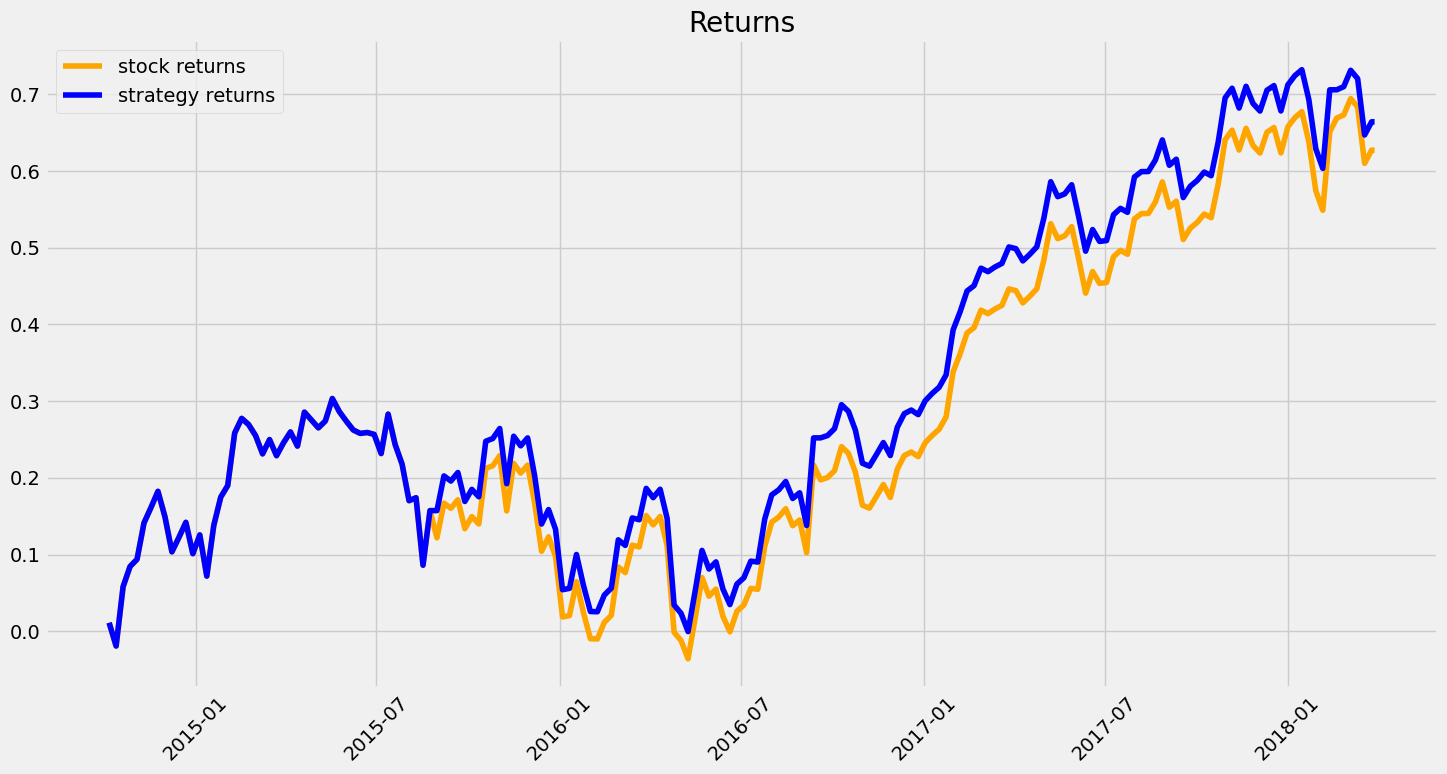

In [ ]:
#visualizing
plt.figure(figsize=(16, 8))
plt.title('Returns')
plt.plot(df['Cum_Return'], color = 'orange', label = 'stock returns')
plt.plot(df['Cum_Strat_Return'], color = 'blue', label = 'strategy returns')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [ ]:
print('The stock gives returns of : ', df['Cum_Return'][-1]*100, '%')
print('The strategy gives returns of : ', df['Cum_Strat_Return'][-1]*100, '%')

The stock gives returns of :  62.73133729608313 %
The strategy gives returns of :  66.42239568132794 %
